# load data

In [ ]:
import csv
f_path = '/Users/eimanwaheed/Desktop/testingData.csv'

In [85]:
with open(f_path, 'r') as read_file:
    reader = csv.reader(read_file)
    i = 0
    for row in reader:
        print(row)

['NDVI_1', 'LAI_1']
['0.17441', '0.102']
['-0.02096', '-0.33302']
['0.74264', '2.30978']
['0.03036', '0.02521']
['0.37454', '0.58403']
['0.07606', '0.21569']
['0.18203', '0.16729']
['0.46933', '1.40631']
['0.04756', '-0.01995']
['0.53681', '1.65175']
['0.18367', '0.08557']
['0.01994', '-0.04355']
['0.30424', '0.92016']
['0.11816', '-0.12322']
['0.26894', '0.29586']
['0.1174', '-0.02738']
['0.08356', '-0.1048']
['0.04419', '0.07859']
['0.15765', '-0.00996']
['0.56043', '1.89156']
['0.39032', '0.66629']
['0.2867', '0.44713']
['0.04578', '-0.26373']
['0.02669', '-0.13715']
['0.46435', '1.2984']
['0.44268', '1.12008']
['0.03856', '0.10054']
['0.03674', '0.02921']
['0.6298', '2.06717']
['0.02749', '0.06346']
['0.18692', '0.14109']
['0.26601', '0.2755']
['0.25593', '0.30013']
['0.10857', '0.12438']
['0.052', '0.09702']
['0.02796', '-0.03299']
['0.56795', '1.61619']
['0.44288', '1.25115']
['0.4147', '0.96003']
['0.03435', '-0.11509']
['0.34118', '0.51226']
['0.30793', '0.25929']
['0.10977', '

# Preprocessing data

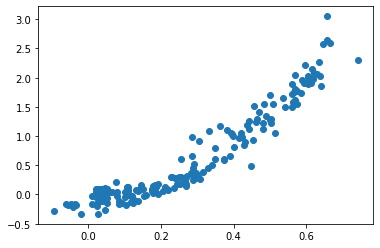

In [86]:
import csv
import numpy as np
from scipy.interpolate import *
from matplotlib.pyplot import *
from sklearn.linear_model import LinearRegression
from scipy.stats import *
%matplotlib inline
file = open(f_path)# opening the learning data
reader = csv.reader(file)# creating a reader
flag = 0# for avoiding the headers in csv file from including in arrays
dataLAI = np.array([]).reshape((1,-1))# stores the annual LAI data
dataNDVI =np.array([])# correspnding NDVI data

for i in reader:
    if flag==0: #removing headers
        flag=1
    else:
        dataNDVI= np.append(dataNDVI,float(i[0]))
        dataLAI = np.append(dataLAI,float(i[1]))

plot(dataNDVI,dataLAI,'o')

In [87]:
import csv
f_path = '/Users/eimanwaheed/Desktop/trainingData.csv'

In [88]:
with open(f_path, 'r') as read_file:
    reader = csv.reader(read_file)
    i = 0
    for row in reader:
        print(row)

['NDVI_1', 'LAI_1']
['0.38772', '0.95603']
['0.10072', '0.06436']
['0.04191', '0.07891']
['0.29743', '0.86776']
['0.50313', '1.55927']
['0.04467', '-0.10029']
['0.41808', '0.9828']
['0.48247', '1.27252']
['0.03001', '-0.02172']
['0.03131', '0.05511']
['0.25471', '0.34119']
['0.58399', '1.68871']
['0.04892', '-0.09329']
['0.45242', '1.03731']
['0.44333', '1.02192']
['0.38807', '0.7922']
['0.0805', '-0.12856']
['0.15009', '0.08824']
['0.13636', '0.08996']
['0.03009', '0.07822']
['0.09257', '-0.02626']
['0.25459', '0.29622']
['0.06193', '-0.09478']
['0.64053', '2.20067']
['0.37698', '0.63029']
['0.3396', '0.53962']
['0.27782', '0.21197']
['0.02152', '-0.10569']
['0.3238', '0.44773']
['0.37862', '0.69015']
['0.04768', '-0.11124']
['0.25213', '-0.04595']
['0.21297', '0.16516']
['0.04511', '0.05017']
['0.03924', '0.07577']
['0.21057', '0.18621']
['0.04229', '-0.02016']
['0.56004', '1.81812']
['0.03283', '0.0338']
['0.02823', '0.05181']
['0.42519', '0.82235']
['-0.0713', '-0.19641']
['0.02722

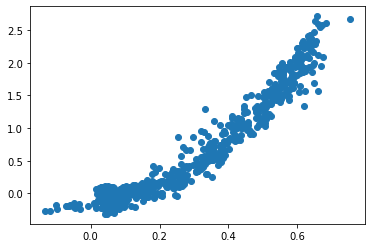

In [89]:
import csv
import numpy as np
from scipy.interpolate import *
from matplotlib.pyplot import *
from sklearn.linear_model import LinearRegression
from scipy.stats import *
%matplotlib inline
file = open(f_path)# opening the learning data
reader = csv.reader(file)# creating a reader
flag = 0# for avoiding the headers in csv file from including in arrays
trainingDataLAI = np.array([]).reshape((1,-1))# stores the annual LAI data
trainingDataNDVI =np.array([])# correspnding NDVI data

for i in reader:
    if flag==0: #removing headers
        flag=1
    else:
        trainingDataNDVI= np.append(trainingDataNDVI,float(i[0]))
        trainingDataLAI = np.append(trainingDataLAI,float(i[1]))

plot(trainingDataNDVI,trainingDataLAI,'o')


# building model

In [113]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100,random_state=0)
r1=regressor.fit(trainingDataNDVI[:,np.newaxis],trainingDataLAI)

In [114]:
y_pred=regressor.predict(dataNDVI[:,np.newaxis])
print("Actual LAI values"+"\t"+"Predicted LAI values")
for i in range(1,200):
    print(dataLAI[i],"\t\t\t",y_pred[i])



Actual LAI values	Predicted LAI values
-0.33302 			 -0.21705543333333302
2.30978 			 2.5923170000000018
0.02521 			 -0.057493643085207685
0.58403 			 0.9101488054599558
0.21569 			 -0.09145089902194148
0.16729 			 0.2777473188975152
1.40631 			 1.0449146499999982
-0.01995 			 -0.20757770964247738
1.65175 			 1.4931842334601502
0.08557 			 0.025584710692387026
-0.04355 			 -0.007940918369867385
0.92016 			 0.39053580756415307
-0.12322 			 0.030030691026467885
0.29586 			 0.3749309141941394
-0.02738 			 -0.014839493939633887
-0.1048 			 -0.08036102049743729
0.07859 			 0.07920850684302408
-0.00996 			 0.026100514859392274
1.89156 			 1.707593985549304
0.66629 			 0.6701469058730151
0.44713 			 0.46409636897342965
-0.26373 			 0.07940854712109774
-0.13715 			 -0.012219743740543314
1.2984 			 0.99872815
1.12008 			 1.0615327212193346
0.10054 			 0.06908899066516777
0.02921 			 0.0396260296359827
2.06717 			 2.184880444117965
0.06346 			 -0.006842898285375349
0.14109 			 0.20843167566426218

In [119]:
from sklearn.metrics import r2_score
print('Coefficient of determination:', r2_score(dataLAI,y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(dataLAI, y_pred, squared=False))
print('Max Error:', metrics.max_error(dataLAI, y_pred))

Coefficient of determination: 0.9369329484253632
Root Mean Squared Error (RMSE): 0.19532863794581928
Max Error: 0.9392037733333354


Text(0, 0.5, 'Predicted LAI data')

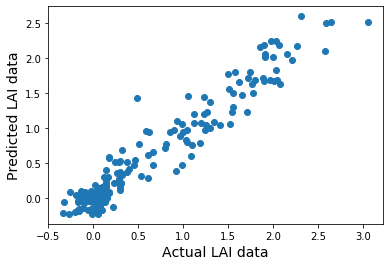

In [98]:
plot(dataLAI,y_pred,'o')
xlabel('Actual LAI data',fontsize=14)
ylabel('Predicted LAI data',fontsize=14)

# saving and loading model

In [66]:
import pickle
filename='finalized_modelRF.sav'
pickle.dump(regressor,open(filename, 'wb'))

In [102]:
import csv
f_path = '/Users/eimanwaheed/Desktop/predictData.csv'

In [103]:
with open(f_path, 'r') as read_file:
    reader = csv.reader(read_file)
    i = 0
    for row in reader:
        print(row)

['NDVI_1', 'LAI_1']
['0.32692', '0.35332']
['0.3376', '0.55079']
['0.3673', '0.54888']
['0.04504', '0.09483']
['0.33036', '0.46218']
['0.1484', '0.04929']
['0.03228', '0.07461']
['0.15954', '0.12263']
['0.20163', '0.16642']
['-0.06897', '-0.18958']
['0.03902', '0.0714']
['0.65694', '2.20501']
['0.03209', '0.04323']
['0.13641', '0.05852']
['0.0406', '0.07476']
['0.43981', '1.12371']
['0.03725', '0.02668']
['0.10502', '0.01126']
['0.0297', '0.02428']
['0.04089', '0.03734']
['0.54926', '1.61403']
['0.27296', '0.31629']
['0.05795', '-0.00868']
['0.26228', '0.24492']
['0.14187', '0.00777']
['0.25341', '0.26967']
['0.16512', '0.12594']
['0.07577', '-0.09904']
['0.18605', '-0.04584']
['0.49442', '1.2523']
['0.24451', '0.24052']
['0.59876', '1.23272']
['0.19862', '0.00064']
['0.0313', '0.08238']
['0.40422', '0.83979']
['0.05909', '0.09933']
['0.03907', '0.0936']
['0.03169', '0.08272']
['0.30484', '0.45973']
['0.26283', '0.27026']
['0.39147', '0.76875']
['0.52783', '1.29273']
['0.04364', '0.098

In [104]:
import csv
import numpy as np
from scipy.interpolate import *
from matplotlib.pyplot import *
from sklearn.linear_model import LinearRegression
from scipy.stats import *
%matplotlib inline
file = open(f_path)# opening the learning data
reader = csv.reader(file)# creating a reader
flag = 0# for avoiding the headers in csv file from including in arrays
predictDataLAI = np.array([]).reshape((1,-1))# stores the annual LAI data
predictDataNDVI =np.array([])# correspnding NDVI data

for i in reader:
    if flag==0: #removing headers
        flag=1
    else:
        predictDataNDVI= np.append(predictDataNDVI,float(i[0]))
        predictDataLAI = np.append(predictDataLAI,float(i[1]))

In [105]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(predictDataNDVI[:,np.newaxis], predictDataLAI)
print(result)

0.9422412436126533
